In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
df_train = pd.read_csv('train.csv')
df_train.head()
#Import the train data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
#Check for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

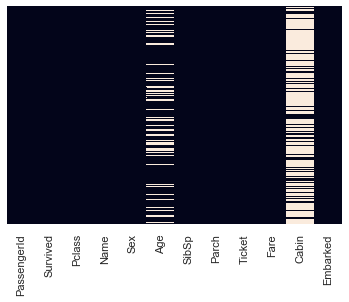

In [146]:
#Get an idea about the missing value spread
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False)

In [147]:
#Understand the shape of the dataset
df_train.shape

(891, 12)

## EDA (Understand the Dataset)

In [148]:
#According to Passenger Class (Pclass)
df_train_pclass = df_train.groupby(['Survived','Pclass'])['PassengerId'].agg(['count']).transform(lambda x: (x/x.sum())*100)
df_train_pclass

count
Survived Pclass           
0        1        8.978676
         2       10.886644
         3       41.750842
1        1       15.263749
         2        9.764310
         3       13.355780

In [149]:
#According to Passenger Gender (Sex)
df_train_sex = df_train.groupby(['Survived','Sex'])['PassengerId'].agg(['count']).transform(lambda x: (x/x.sum())*100)
df_train_sex

count
Survived Sex              
0        female   9.090909
         male    52.525253
1        female  26.150393
         male    12.233446

In [150]:
#According to Class with Gender 
df_train_pcl_sex = df_train.groupby(['Survived','Sex','Pclass'])['PassengerId'].agg(['count']).transform(lambda x: (x/x.sum())*100)
df_train_pcl_sex

count
Survived Sex    Pclass           
0        female 1        0.336700
                2        0.673401
                3        8.080808
         male   1        8.641975
                2       10.213244
                3       33.670034
1        female 1       10.213244
                2        7.856341
                3        8.080808
         male   1        5.050505
                2        1.907969
                3        5.274972

In [151]:
#Check for any correlations between each features 
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


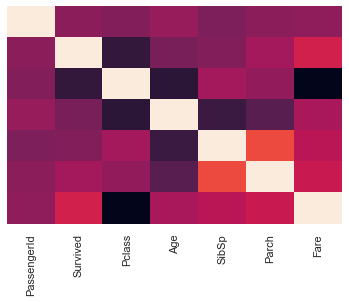

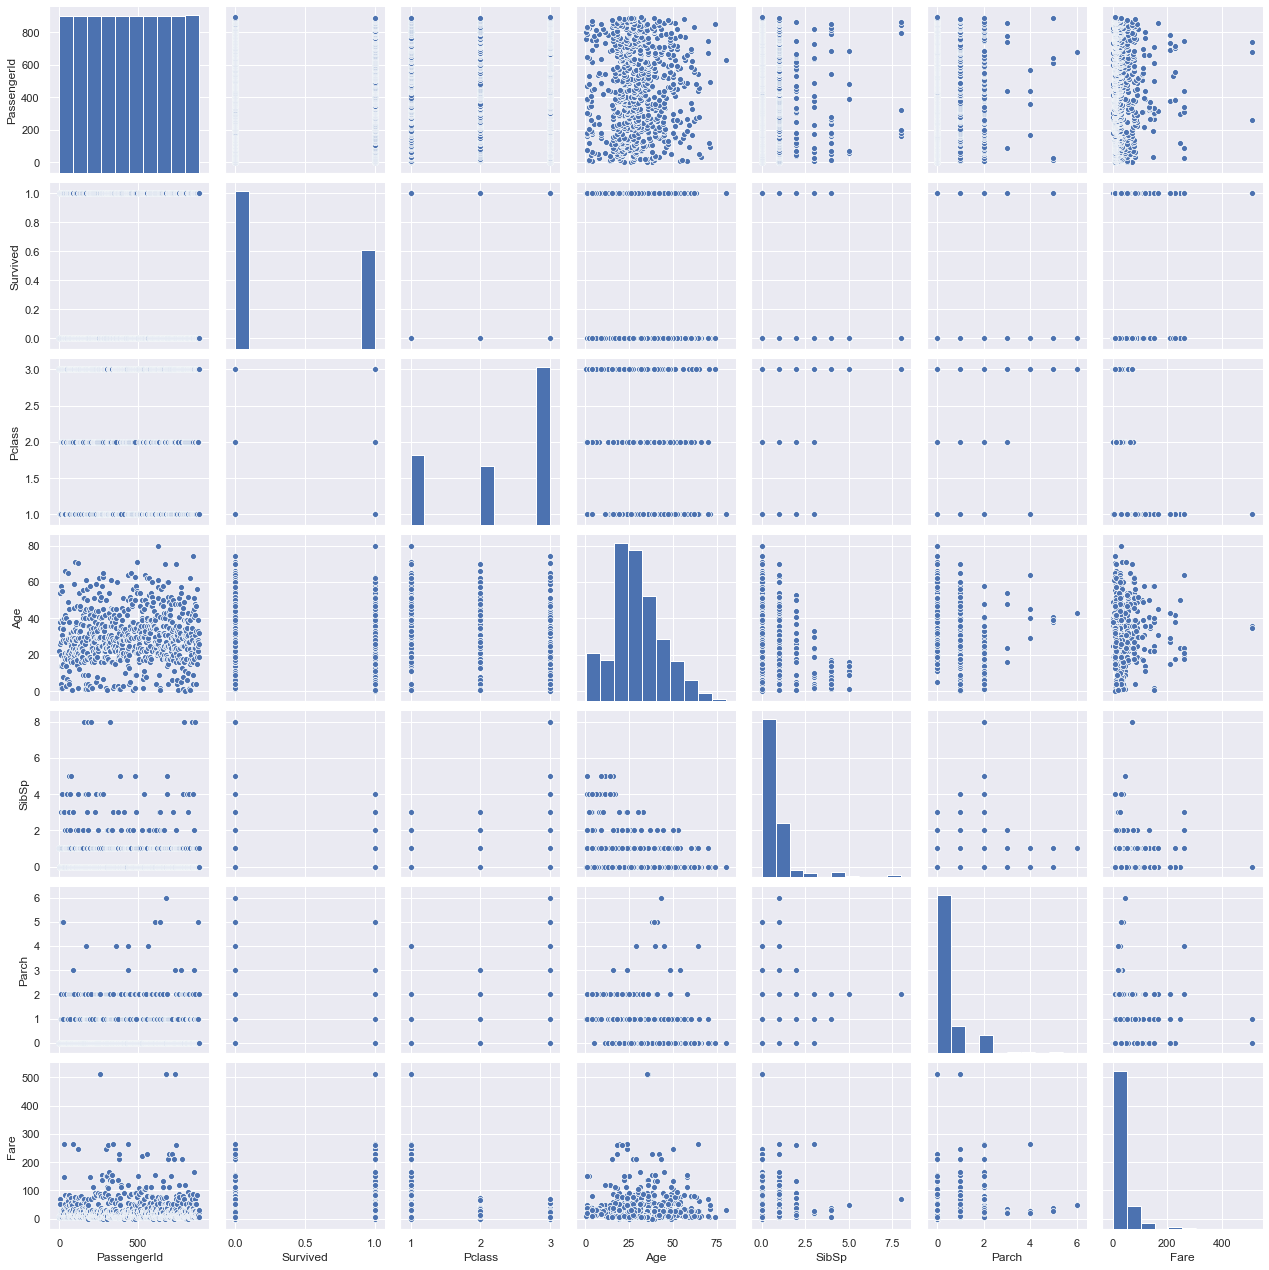

In [152]:
#Display each correlation point on heatmap
sns.heatmap(df_train.corr(),yticklabels=False, cbar=False)
sns.pairplot(df_train)

There's no significant correlation among variables/ features except Pclass and Fare and SibSp and Parch

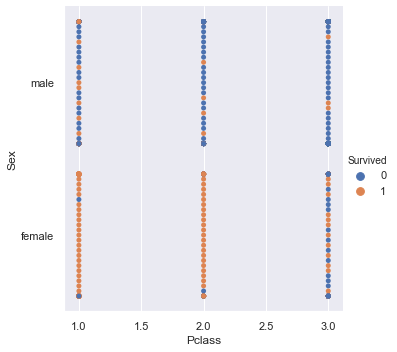

In [153]:
#Understand the survivors data
sns.catplot(x='Pclass', y='Sex', data=df_train, hue='Survived', kind='swarm')

In [154]:
df_train['SibParchSq'] = (df_train['SibSp']-df_train['Parch'])*(df_train['SibSp']-df_train['Parch'])
df_train['Sib + Parch'] = df_train['SibSp']+df_train['Parch']
df_train['Sib - Perch'] = df_train['SibSp']-df_train['Parch']
df_train['Sib x Perch'] = df_train['SibSp']*df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibParchSq,Sib + Parch,Sib - Perch,Sib x Perch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,0


[Text(0, 0.5, '')]

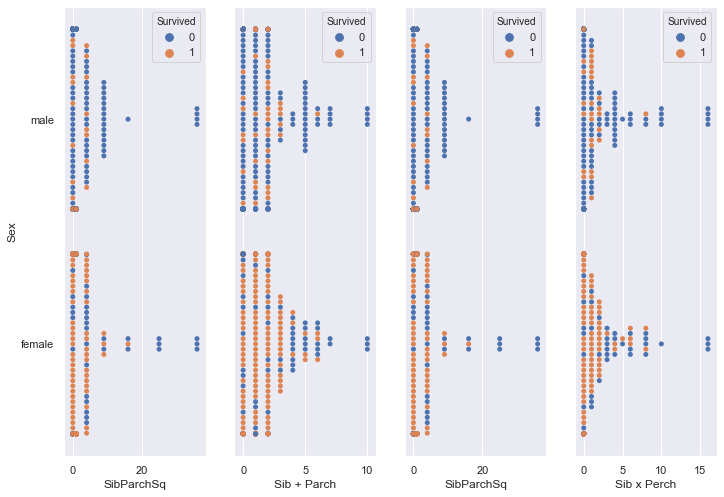

In [155]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
g1 = sns.swarmplot(x='SibParchSq', y='Sex', data=df_train, hue='Survived', ax=ax1)
g2 = sns.swarmplot(x='Sib + Parch', y='Sex', data=df_train, hue='Survived', ax=ax2)
g3 = sns.swarmplot(x='SibParchSq', y='Sex', data=df_train, hue='Survived', ax=ax3)
g4 = sns.swarmplot(x='Sib x Perch', y='Sex', data=df_train, hue='Survived', ax=ax4)
g2.set(yticklabels=[])
g2.set(ylabel=None)
g3.set(yticklabels=[])
g3.set(ylabel=None)
g4.set(yticklabels=[])
g4.set(ylabel=None)

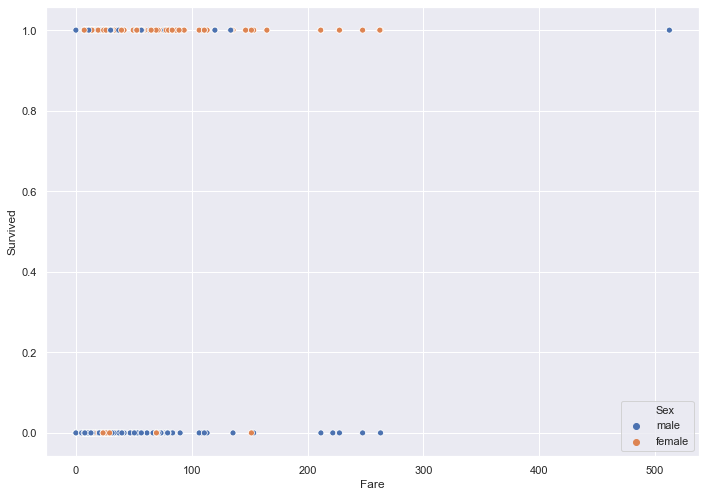

In [156]:
sns.scatterplot(x='Fare', y='Survived', data=df_train, hue='Sex')

## PCA

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
df_trainPCA = df_train[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
df_trainPCA.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,1,0,7.2500
1,1,female,1,0,71.2833
2,3,female,0,0,7.9250
3,1,female,1,0,53.1000
4,3,male,0,0,8.0500


In [159]:
df_trainPCA['Sex'].replace(['male','female'], [1,2], inplace= True)
df_trainPCA.head()

C:\Users\Chinthaka Asiri\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,7.2500
1,1,2,1,0,71.2833
2,3,2,0,0,7.9250
3,1,2,1,0,53.1000
4,3,1,0,0,8.0500


In [160]:
scaler = StandardScaler()
scaler.fit(df_trainPCA)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [161]:
scaled_data=scaler.transform(df_trainPCA)

In [162]:
scaled_data

array([[ 0.82737724, -0.73769513,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  1.35557354,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724,  1.35557354, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.73769513, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724, -0.73769513, -0.4745452 , -0.47367361, -0.49237783]])

In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA(n_components=2)

In [165]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [166]:
x_pca=pca.transform(scaled_data)

In [167]:
df_pca = pd.DataFrame(x_pca)
df_pca.head()

,0,1
0,-0.977757,0.616041
1,1.571866,-1.094753
2,-0.478895,0.316137
3,1.362044,-0.968668
4,-1.302527,0.128605


In [168]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


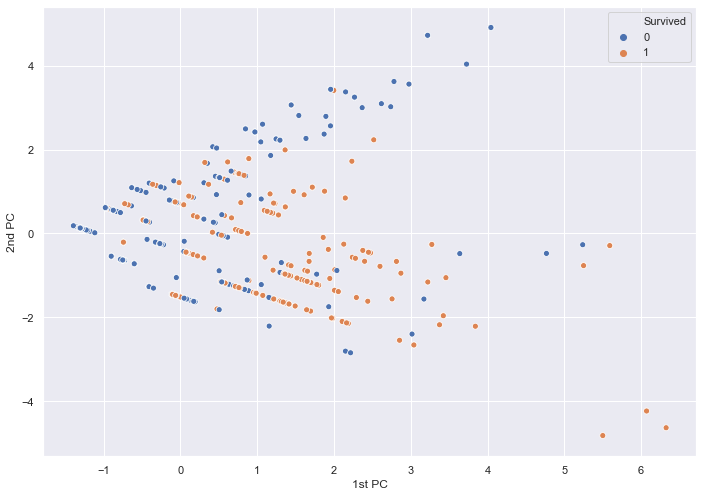

In [169]:
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=df_train['Survived'])
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()

In [170]:
df = pd.concat([df_pca, df_train['Survived']], axis=1, join='inner')
df.columns = ['PC1', 'PC2','Survived']
df.head()

,PC1,PC2,Survived
0,-0.977757,0.616041,0
1,1.571866,-1.094753,1
2,-0.478895,0.316137,1
3,1.362044,-0.968668,1
4,-1.302527,0.128605,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       891 non-null    float64
 1   PC2       891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


## KNN (ML Algorithum)

In [172]:
#Implement a train test split and understand the best K value 
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test, y_train, y_test = train_test_split(df_pca, df_train['Survived'], test_size=0.3)

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [175]:
#Select the best K value
accuracy_rate = []
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_pca,df_train['Survived'],cv=10)
    accuracy_rate.append(score.mean())

Text(0.5, 0, 'K')

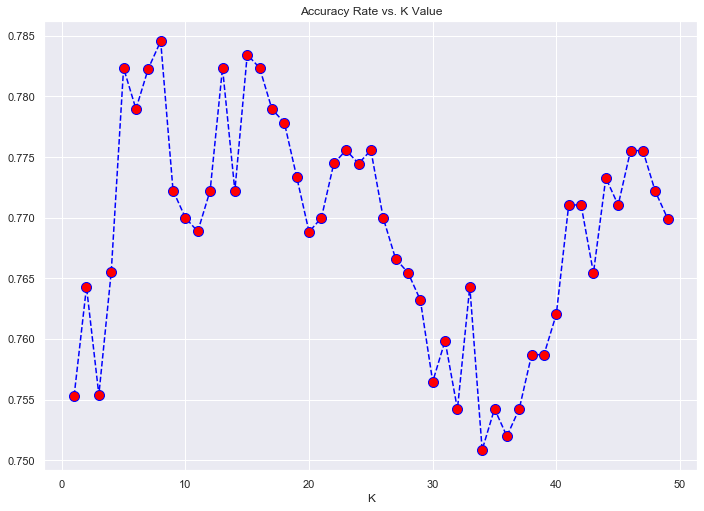

In [176]:
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')

In [177]:
#K=34
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       169
           1       0.62      0.70      0.66        99

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.74      0.73      0.73       268



## Predict the values with given test data set

In [178]:
#Import the test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [179]:
#Prepare the two PCs
df_testPCA = df_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
df_testPCA.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,male,0,0,7.8292
1,3,female,1,0,7.0000
2,2,male,0,0,9.6875
3,3,male,0,0,8.6625
4,3,female,1,1,12.2875


In [180]:
#Replace Male as 1 and Female as 2
df_testPCA['Sex'].replace(['male','female'], [1,2], inplace= True)
df_testPCA.head()

C:\Users\Chinthaka Asiri\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,SibSp,Parch,Fare
0,3,1,0,0,7.8292
1,3,2,1,0,7.0000
2,2,1,0,0,9.6875
3,3,1,0,0,8.6625
4,3,2,1,1,12.2875


In [181]:
#scaler2 = StandardScaler()
#scaler2.fit(df_testPCA)

In [182]:
#scaled_data2=scaler2.transform(df_testPCA)
#scaled_data2

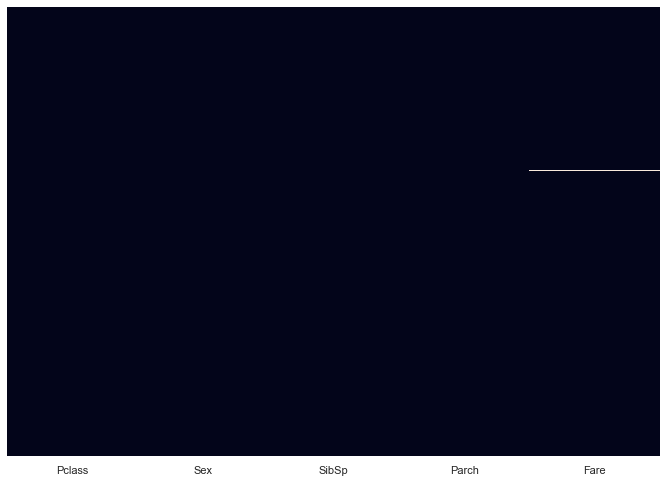

In [183]:
#pca.fit(scaled_data2) Note: We can't perform this code due to null value in Fare. We have to clean the null and perform the test again. 
sns.heatmap(df_testPCA.isnull(),yticklabels=False, cbar=False)

In [184]:
df_testPCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 16.5 KB


In [185]:
#Fill the missing Fare value by using leniar interpolation method. (Note: We do not consider Age and Cabin data)
df_testPCA = df_testPCA.interpolate()

In [186]:
df_testPCA.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [187]:
df_testPCA.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,0,0,7.8292
1,3,2,1,0,7.0000
2,2,1,0,0,9.6875
3,3,1,0,0,8.6625
4,3,2,1,1,12.2875


In [188]:
scaler2 = StandardScaler()
scaler2.fit(df_testPCA)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [189]:
scaled_data2=scaler2.transform(df_testPCA)
scaled_data2

array([[ 0.87348191, -0.75592895, -0.49947002, -0.4002477 , -0.49718465],
       [ 0.87348191,  1.32287566,  0.61699237, -0.4002477 , -0.51204815],
       [-0.31581919, -0.75592895, -0.49947002, -0.4002477 , -0.46387442],
       ...,
       [ 0.87348191, -0.75592895, -0.49947002, -0.4002477 , -0.50756687],
       [ 0.87348191, -0.75592895, -0.49947002, -0.4002477 , -0.49322678],
       [ 0.87348191, -0.75592895,  0.61699237,  0.61989583, -0.23674897]])

In [190]:
pca.fit(scaled_data2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [191]:
xtr_pca=pca.transform(scaled_data2)

In [192]:
df_pca_tr = pd.DataFrame(xtr_pca)
df_pca_tr.columns = ['PC1', 'PC2']
df_pca_tr.head()

,PC1,PC2
0,-1.314104,-0.002980
1,-0.258196,0.910299
2,-0.698613,-0.661877
3,-1.304709,-0.006743
4,0.176387,1.456248


In [193]:
df_pca_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     418 non-null    float64
 1   PC2     418 non-null    float64
dtypes: float64(2)
memory usage: 6.7 KB


In [194]:
x_train_fin = df_pca
y_train_fin = df_train['Survived']
x_test_fin = df_pca_tr
y_test_fin = df_pca_tr.drop(['PC1', 'PC2'], axis=1)

In [195]:
#K=34
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train_fin, y_train_fin)
y_test_fin = knn.predict(x_test_fin)
#knn.fit(x_train_fin, y_train_fin)
#pred = knn.predict(x_test_fin)
#print(classification_report(y_test_fin,pred))

In [196]:
pred = pd.DataFrame(y_test_fin)
pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [197]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [198]:
#Finalize the predicted list
df_pred = pd.concat([df_test, pred], axis=1, join='inner')
df_pred.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [202]:
Final_list = df_pred[['PassengerId', 0]]
Final_list.columns = ['PassengerId', 'Survived']
#Final_list.set_index('PassengerId', inplace=True)
Final_list.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [203]:
Final_list.to_csv('Chinthaka_Titanic_v1.csv', index=0)

In [204]:
#2021-05-06 | 11.16AM